In [1]:
import pandas as pd

In [4]:
# Selected modalities
selected_folders = ["MPRAGE", "MP-RAGE", "MP-RAGE_REPEAT", "MPRAGE_SENSE2", "Sagittal_3D_FLAIR"]

In [12]:
my_images_metadata_df = pd.read_csv("../mri-images/ipcv-2_11_02_2024.csv")
my_images_metadata_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I293909,127_S_4198,CN,F,79,v05,MRI,Accelerated Sag IR-SPGR,Original,3/28/2012,DCM,NaN
1,I920967,099_S_4076,CN,F,79,init,MRI,Calibration Scan,Original,10/20/2017,DCM,NaN
2,I277098,082_S_4090,CN,M,72,v05,MRI,MPRAGE,Original,1/04/2012,DCM,NaN
3,I389418,941_S_4100,CN,F,81,v21,MRI,localizer,Original,8/30/2013,DCM,NaN
4,I956368,033_S_4177,CN,M,91,init,MRI,Field Mapping,Original,1/23/2018,DCM,NaN


In [13]:
my_images_metadata_df.shape

(5103, 12)

In [15]:
filtered_images_metadata_df = pd.DataFrame()

In [16]:
for folder_name in selected_folders:
    filtered_df = my_images_metadata_df[my_images_metadata_df["Description"] == folder_name]
    filtered_images_metadata_df = pd.concat([filtered_images_metadata_df, filtered_df])

In [19]:
filtered_images_metadata_df["Description"].unique()

array(['MPRAGE'], dtype=object)

In [ ]:
for description in my_images_metadata_df["Description"].unique():
    if description in selected_folders:
        print(description)

MPRAGE


In [22]:
filtered_images_metadata_df.shape

(287, 12)

In [23]:
filtered_images_metadata_df["Subject"].nunique()

56

In [25]:
my_images_metadata_df["Description"].value_counts()

3 Plane Localizer                                                  721
localizer                                                          664
Field Mapping                                                      361
MPRAGE                                                             287
Axial T2-FLAIR                                                     268
                                                                  ... 
Sag 3D T2 CUBE  (MSV21)                                              1
HighResHippo Scan (Oblique - perpendicular to hippocampal tail)      1
Axial T2-FLAIR REPEAT                                                1
gre_field_mapping_NO ANGLE                                           1
REPEAT Axial T2-FLAIR                                                1
Name: Description, Length: 135, dtype: int64

## EDA

In [26]:
import matplotlib.pyplot as plt

(array([101.,   0.,   0., 133.,   0.,   0.,  45.,   0.,   0.,   8.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

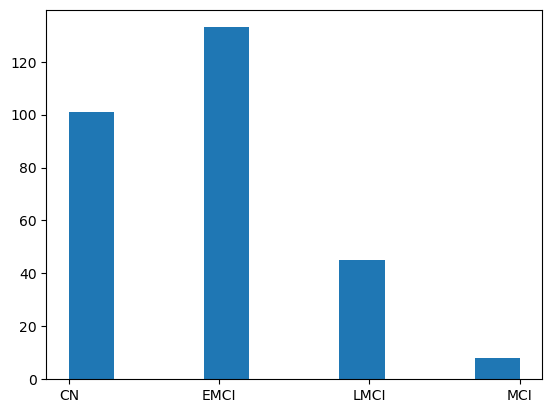

In [27]:
plt.hist(filtered_images_metadata_df["Group"])

## All Required Images Metadata Analysis

In [28]:
all_images_metadata_df = pd.read_csv("../mri-images/all_required_images_11_02_2024.csv")
all_images_metadata_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I82186,023_S_0031,CN,F,80,m24,MRI,B1-calibration Body,Original,11/14/2007,DCM,NaN
1,I360490,029_S_4384,CN,M,64,v11,MRI,3 Plane Localizer,Original,2/14/2013,DCM,NaN
2,I296823,029_S_4384,CN,M,63,v04,MRI,3-plane localizer,Original,3/21/2012,DCM,NaN
3,I1058025,006_S_0731,CN,M,84,y1,MRI,HighResHippo Scan (Oblique - perpendicular to ...,Original,10/10/2018,DCM,NaN
4,I355778,941_S_4376,CN,F,78,v11,MRI,localizer,Original,1/22/2013,DCM,NaN


In [29]:
all_images_metadata_df.shape

(17966, 12)

(array([9137.,    0.,    0., 5463.,    0.,    0., 1688.,    0.,    0.,
        1678.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

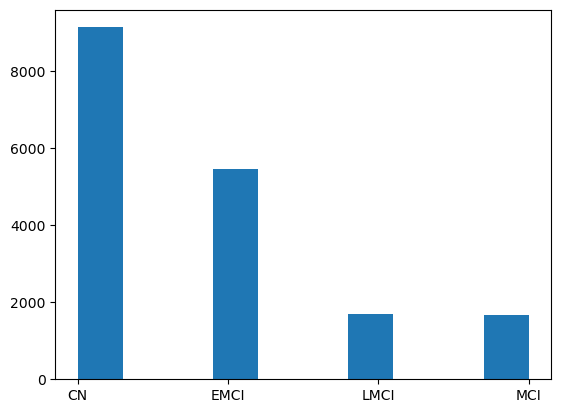

In [30]:
plt.hist(all_images_metadata_df["Group"])

## Only AD Patients Metadata

In [32]:
only_ad_patients_df = pd.read_csv("../mri-images/only_AD_patients_11_02_2024.csv")
only_ad_patients_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I133024,029_S_1056,AD,F,73,m24,MRI,3-pl T2* FGRE S,Original,1/07/2009,DCM,NaN
1,I360467,029_S_4307,AD,M,80,v11,MRI,Axial T2 Star,Original,2/14/2013,DCM,NaN
2,D10955287,033_S_10249,AD,F,84,4_sc,MRI,Axial 3D ME T2 GRE (MSV21),Original,9/20/2024,DCM,NaN
3,I30294,032_S_1101,AD,F,71,sc,MRI,SURVEY,Original,11/21/2006,DCM,NaN
4,I264963,116_S_4338,AD,M,81,v02,MRI,localizer,Original,11/02/2011,DCM,NaN


In [34]:
only_ad_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13620 entries, 0 to 13619
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  13620 non-null  object 
 1   Subject        13620 non-null  object 
 2   Group          13620 non-null  object 
 3   Sex            13620 non-null  object 
 4   Age            13620 non-null  int64  
 5   Visit          13620 non-null  object 
 6   Modality       13620 non-null  object 
 7   Description    13620 non-null  object 
 8   Type           13620 non-null  object 
 9   Acq Date       13620 non-null  object 
 10  Format         13620 non-null  object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.2+ MB


In [35]:
(only_ad_patients_df["Description"] == "MPRAGE").sum()

717